 #                                         KIVA ANALYSIS

This analysis is to study the kind of borrowers that Kiva.org has.Kiva.org is an online crowdfunding platform to extend financial services to poor and financially excluded people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people. In order to set investment priorities, help inform lenders, and understand their target communities, knowing the level of poverty of each borrower is critical. However, this requires inference based on a limited set of information for each borrower. 

At the end of the analysis we hope to have a detailed understanding of the organization's lending patterns. 

# Import the data

Import the necessary python libraries. 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load the data

The .csv files the information of the lenders in terms of gender, region, loan amount, repayment time etc. 

In [2]:
#The loan information 
loan_data = pd.read_csv('kiva_loans.csv')

#The region locations
region_data = pd.read_csv('datasets_12414_19728_kiva_mpi_region_locations.csv')

#The loan theme 
loan_theme = pd.read_csv('loan_theme_ids.csv')

#Loan theme by region
loan_theme_region = pd.read_csv('loan_themes_by_region.csv')


# Summary display of each dataframe


In [3]:
loan_data.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [4]:
region_data.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [5]:
loan_theme.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [6]:
loan_theme_region.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


# Concise summary of each dataset 

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [8]:
region_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  984 non-null    object 
 1   ISO           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   MPI           984 non-null    float64
 6   geo           2772 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


In [9]:
loan_theme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779092 entries, 0 to 779091
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               779092 non-null  int64  
 1   Loan Theme ID    764279 non-null  object 
 2   Loan Theme Type  764279 non-null  object 
 3   Partner ID       764279 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.8+ MB


In [10]:
loan_theme_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15736 entries, 0 to 15735
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Partner ID          15736 non-null  int64  
 1   Field Partner Name  15736 non-null  object 
 2   sector              15736 non-null  object 
 3   Loan Theme ID       15736 non-null  object 
 4   Loan Theme Type     15736 non-null  object 
 5   country             15736 non-null  object 
 6   forkiva             15736 non-null  object 
 7   region              15736 non-null  object 
 8   geocode_old         1200 non-null   object 
 9   ISO                 15722 non-null  object 
 10  number              15736 non-null  int64  
 11  amount              15736 non-null  int64  
 12  LocationName        15736 non-null  object 
 13  geocode             13662 non-null  object 
 14  names               13661 non-null  object 
 15  geo                 15736 non-null  object 
 16  lat 

# Numerical Summary of each dataset

In [11]:
loan_data.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [12]:
region_data.describe()

,MPI,lat,lon
count,984.000000,892.000000,892.000000
mean,0.211330,9.169710,16.635888
std,0.183621,16.484531,61.234566
min,0.000000,-34.947896,-122.747131
25%,0.053000,-1.027901,-12.819854
50%,0.155000,11.211379,26.419389
75%,0.341500,18.084292,47.019436
max,0.744000,49.264748,138.581284


In [13]:
loan_theme.describe()

,id,Partner ID
count,7.790920e+05,764279.000000
mean,1.047475e+06,180.825840
std,2.282538e+05,97.914029
min,6.386310e+05,9.000000
25%,8.499768e+05,126.000000
50%,1.046528e+06,145.000000
75%,1.244768e+06,204.000000
max,1.444243e+06,557.000000


In [14]:
loan_theme_region.describe()

,Partner ID,number,amount,lat,lon,rural_pct
count,15736.000000,15736.000000,1.573600e+04,13662.000000,13662.000000,14344.000000
mean,191.376144,53.628432,2.003991e+04,14.328878,29.433569,68.084635
std,118.705003,403.079799,9.636941e+04,16.757689,83.255739,26.550064
min,9.000000,1.000000,2.500000e+01,-34.610548,-172.790661,0.000000
25%,123.000000,1.000000,9.500000e+02,6.266728,-71.967463,60.000000
50%,154.000000,4.000000,2.600000e+03,13.484102,41.899993,73.000000
75%,217.000000,15.000000,8.750000e+03,22.189940,106.677321,85.000000
max,545.000000,22538.000000,4.929900e+06,51.314017,159.972900,100.000000


# Cleaning the data 

Cleaning data will involve:
    1. Merge dataframes in terms of similarity
    2. Drop columns that I think are unnecessary.
    3. Handle the missing values. 

1. Preparing and cleaning the data for the loan_data and loan_theme dataframes

In [15]:
kiva_loans = pd.merge(loan_data, loan_theme, on='id',how='outer')

In [16]:
kiva_loans.drop(['funded_amount','activity','use','country_code','currency','partner_id','posted_time'
                         ,'disbursed_time','funded_time','lender_count','tags','Loan Theme ID','Loan Theme Type','Partner ID'],
                axis=1,inplace=True)

#Display the summarized data
kiva_loans.head()

,id,loan_amount,sector,country,region,term_in_months,borrower_genders,repayment_interval,date
0,653051,300.0,Food,Pakistan,Lahore,12.0,female,irregular,2014-01-01
1,653053,575.0,Transportation,Pakistan,Lahore,11.0,"female, female",irregular,2014-01-01
2,653068,150.0,Transportation,India,Maynaguri,43.0,female,bullet,2014-01-01
3,653063,200.0,Arts,Pakistan,Lahore,11.0,female,irregular,2014-01-01
4,653084,400.0,Food,Pakistan,Abdul Hakeem,14.0,female,monthly,2014-01-01


In [17]:
kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779098 entries, 0 to 779097
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  779098 non-null  int64  
 1   loan_amount         671205 non-null  float64
 2   sector              671205 non-null  object 
 3   country             671205 non-null  object 
 4   region              614405 non-null  object 
 5   term_in_months      671205 non-null  float64
 6   borrower_genders    666984 non-null  object 
 7   repayment_interval  671205 non-null  object 
 8   date                671205 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 59.4+ MB


In [18]:
kiva_loans.isnull().sum().sort_values(ascending=False)

region                164693
borrower_genders      112114
date                  107893
repayment_interval    107893
term_in_months        107893
country               107893
sector                107893
loan_amount           107893
id                         0
dtype: int64

As the missing numbers are large in number, the analysis will be based on available values to avoid false information. 

However, the dataframe has multiple inconsistent entries in its borrower_genders column. I would like to get a cleaner gender column. 

In [19]:
kiva_loans['female_borrowers'] = kiva_loans['borrower_genders'].str.contains('female')

In [20]:
kiva_loans.loc[kiva_loans['female_borrowers'] == True, 'gender'] = 'female'
kiva_loans.loc[kiva_loans['female_borrowers'] == False, 'gender'] = 'male'

In [21]:
kiva_loans.drop(['borrower_genders','female_borrowers'],axis=1,inplace=True)

A personal preference, I would prefer working with the year the loan was given as opposed to the specific dates. 

In [22]:
kiva_loans['year'] = pd.DatetimeIndex(kiva_loans['date']).year
kiva_loans.drop(['date'],axis=1,inplace=True)

In [23]:
kiva_loans.head()

,id,loan_amount,sector,country,region,term_in_months,repayment_interval,gender,year
0,653051,300.0,Food,Pakistan,Lahore,12.0,irregular,female,2014.0
1,653053,575.0,Transportation,Pakistan,Lahore,11.0,irregular,female,2014.0
2,653068,150.0,Transportation,India,Maynaguri,43.0,bullet,female,2014.0
3,653063,200.0,Arts,Pakistan,Lahore,11.0,irregular,female,2014.0
4,653084,400.0,Food,Pakistan,Abdul Hakeem,14.0,monthly,female,2014.0


2. Preparing and cleaning the data for the region_data and loan_theme_region dataframes

In [24]:
regional_data = pd.merge(region_data,loan_theme_region, on=['country','region','LocationName','ISO','geo','lat','lon'],
                         how='left')
regional_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3032 entries, 0 to 3031
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LocationName        1244 non-null   object 
 1   ISO                 1268 non-null   object 
 2   country             1268 non-null   object 
 3   region              1244 non-null   object 
 4   world_region        1268 non-null   object 
 5   MPI                 1244 non-null   float64
 6   geo                 3032 non-null   object 
 7   lat                 1152 non-null   float64
 8   lon                 1152 non-null   float64
 9   Partner ID          351 non-null    float64
 10  Field Partner Name  351 non-null    object 
 11  sector              351 non-null    object 
 12  Loan Theme ID       351 non-null    object 
 13  Loan Theme Type     351 non-null    object 
 14  forkiva             351 non-null    object 
 15  geocode_old         158 non-null    object 
 16  number

In [25]:
regional_data.drop(['ISO','LocationName','geo','lat','lon','Partner ID','Field Partner Name','Loan Theme ID','Loan Theme Type',
                  'forkiva','geocode_old','number','geocode','names','mpi_region','mpi_geo','rural_pct'],axis=1,inplace=True)

#Display the summarized data
regional_data.head()

,country,region,world_region,MPI,sector,amount
0,Afghanistan,Badakhshan,South Asia,0.387,NaN,NaN
1,Afghanistan,Badghis,South Asia,0.466,NaN,NaN
2,Afghanistan,Baghlan,South Asia,0.300,NaN,NaN
3,Afghanistan,Balkh,South Asia,0.301,NaN,NaN
4,Afghanistan,Bamyan,South Asia,0.325,NaN,NaN


# Exploratory data analysis 

For this analysis, I would like look at the following information:
1. Who is borrowing the money? - Gender
2. What are they doing with the money? - Sector
3. Where do they come from? - Country
4. Poverty level? - MPI
5. Loan repayment patterns? - Repayment Intervals and Term in months
6. Regional data. 

# 1. Who is borrowing the money: Gender analysis of Kiva Borrowers 

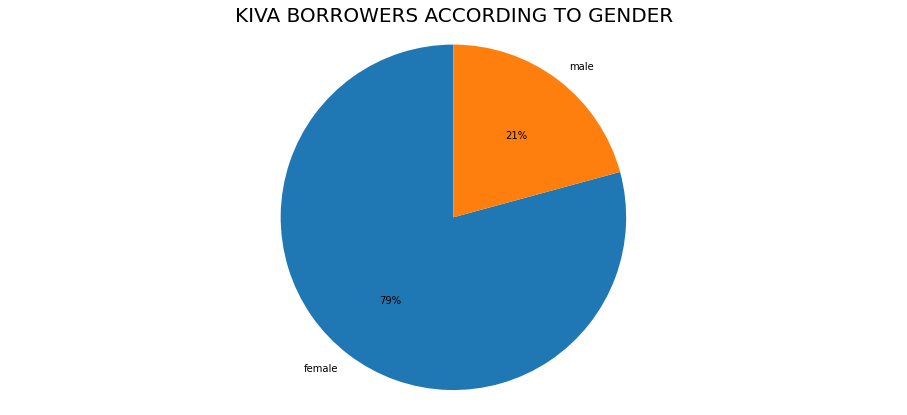

In [26]:
gender = kiva_loans['gender'].value_counts()

#Plot a pie-chart to show the gender and its percentages
plt.figure(figsize=(16,7))

plt.pie(gender.values, labels = gender.index, autopct = '%1.0f%%',startangle=90)
plt.axis('equal')
plt.title('KIVA BORROWERS ACCORDING TO GENDER', fontsize=20)
plt.show()

This visualization shows that most of Kiva's borrowers are female(79%). 

In [27]:
gender_loans = pd.pivot_table(kiva_loans, values=['loan_amount'], aggfunc=sum, index=['gender'])
gender_loans


,loan_amount
gender,
female,433544150.0
male,126923000.0


Excat amount distributed among the genders 

# 2. What are they doing with the borrowed money: Sectors

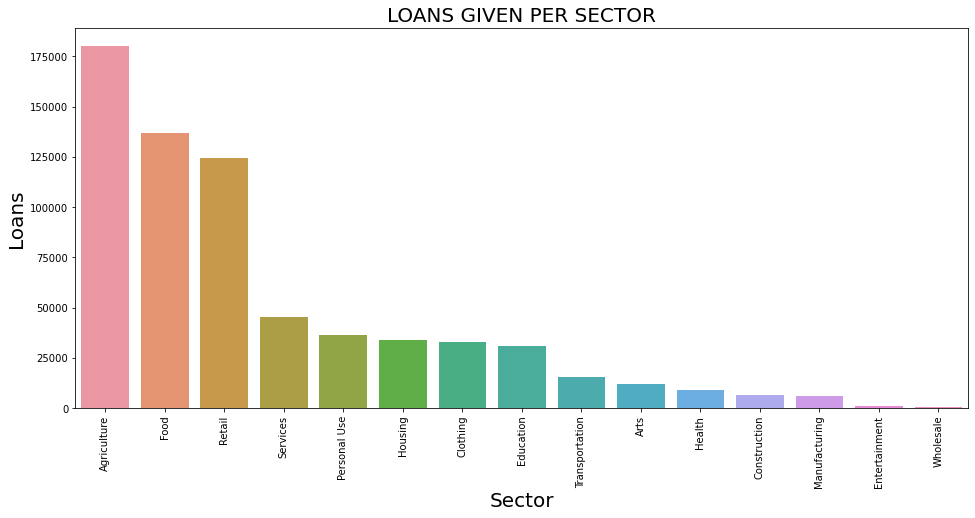

In [28]:
sector = kiva_loans['sector'].value_counts()

#Create a bar graph showing the different sectors.
plt.figure(figsize=(16,7))

sns.barplot(y=sector.values,x=sector.index)

plt.ylabel('Loans',fontsize=20)
plt.xlabel('Sector',fontsize=20)
plt.title('LOANS GIVEN PER SECTOR',fontsize=20)
plt.xticks(rotation=90)

plt.show()

The Agriculture sector receives the most funded loans while WholeSale and Entertainment received the least amount of loans. 

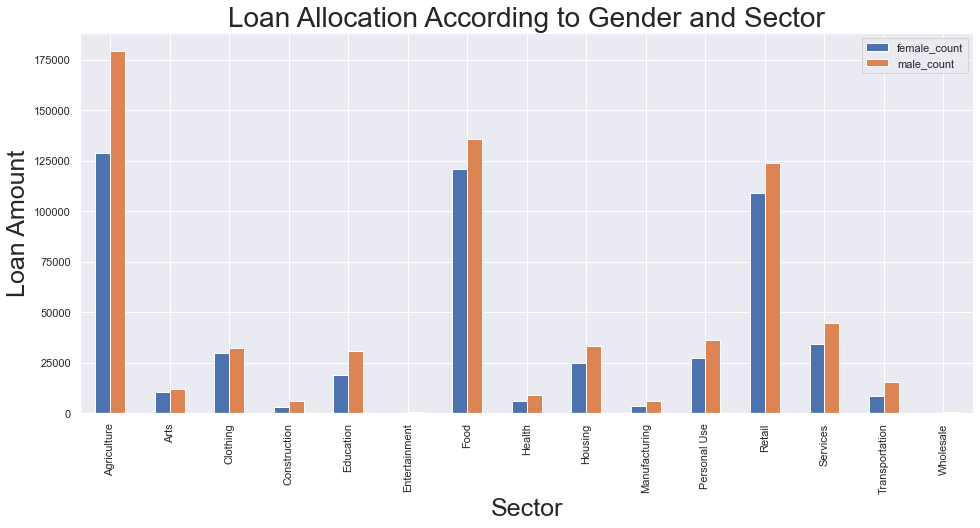

In [29]:
kiva_loans['female_count'] = kiva_loans['gender'].str.count('female')
kiva_loans['male_count'] = kiva_loans['gender'].str.count('male')

sns.set()

sector_gender = kiva_loans.pivot_table(values=['female_count','male_count'],index=['sector'],aggfunc=sum)
sector_gender.plot(figsize =(16,7),kind='bar')
plt.ylabel('Loan Amount',fontsize=25)
plt.xlabel('Sector',fontsize=25)
plt.title('Loan Allocation According to Gender and Sector',fontsize=28)

plt.show()


However, when it comes to borrowing, the men are given preference in terms of loan allocation in all sectors with Agriculture, 
Food and Retail being the top 3 most funded sectors. 

# 3. Where do most of Kiva borrowers come from? 

3.1 Countries with most borrowers

In [30]:
country = kiva_loans['country'].value_counts()

country_borrowers = pd.pivot_table(kiva_loans,index =['country'],values=['loan_amount' ],
                                   aggfunc=sum).sort_values(by=['loan_amount'],ascending=False)

country_borrowers.head(10)

,loan_amount
country,
Philippines,55342225.0
Kenya,34534300.0
United States,31496375.0
Peru,30867400.0
Paraguay,29629075.0
El Salvador,26603650.0
Cambodia,19872700.0
Bolivia,19843250.0
Rwanda,16646300.0


The above table comprises of the top 10 countries that borrow from Kiva. Phillipines, Kenya and The United States are the top 3 borrowers respectively.

3.2 Regional representation of Kiva Borrowers

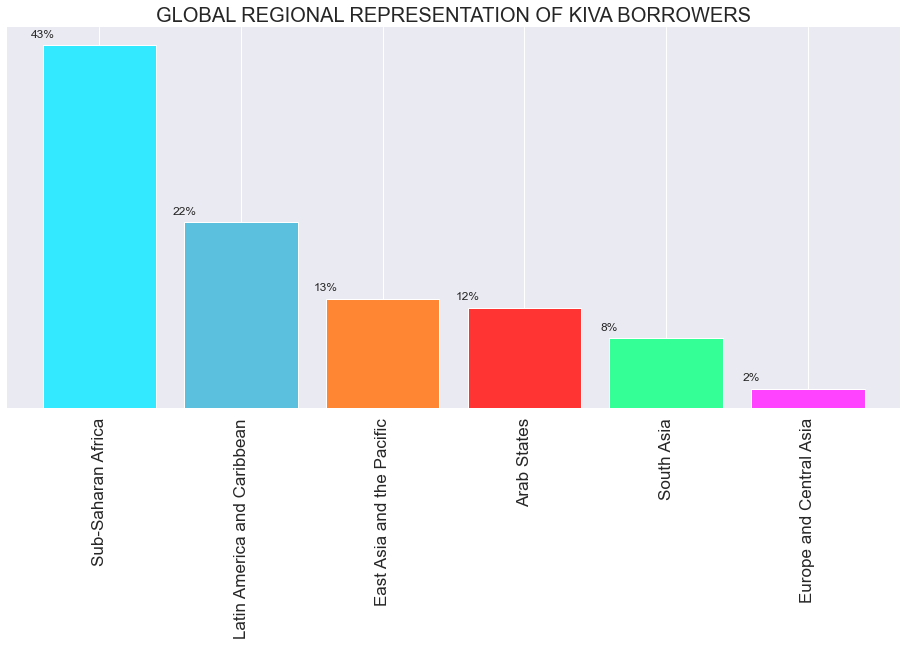

In [31]:
world_region = region_data['world_region'].value_counts()

colors_list = ['#33e9ff','#5bc0de','#ff8633', '#ff3433','#33ff96','#ff43ff']
ax = (world_region.div(world_region.sum(), axis=0)).plot(kind='bar',figsize=(16,7), color = colors_list,width = 0.8,
                                                         edgecolor=None)

plt.title('GLOBAL REGIONAL REPRESENTATION OF KIVA BORROWERS',fontsize=20)

plt.xticks(fontsize=17)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

#Adding the annotations.
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01),ha='center')
    
plt.show()


Most the Kiva borrowers come from the Sub-Saharan Region with 43% of the countries while Europe and Central Asia has the least percentage of borrowers. 

 According to this [report](https://www.ophi.org.uk/wp-content/uploads/ophi-wp-61.pdf), South Asia has the highest global MPI poor people distribution at 52.9%, followed by Sub-Saharan Africa then East Asia and the Pacific. However, Kiva doesn't seem to lend based on that criteria as South Asia only receives 8% of its loans. 
       
         
 

Relating these percentages to the Multidimensional Poverty Index(MPI):

MPI identifies multiple deprivations at the household and individual level in health, education and standard of living.

In [32]:
world_region = regional_data['world_region'].value_counts()

world_region = pd.pivot_table(regional_data,index =['world_region'],values=['MPI' ],
                                   aggfunc=sum).sort_values(by=['MPI'],ascending=False)

world_region['MPI (%)'] = (world_region.MPI/world_region.MPI.sum()*100)

world_region

,MPI,MPI (%)
world_region,,
Sub-Saharan Africa,158.285,67.544444
East Asia and the Pacific,23.280,9.934199
Latin America and Caribbean,19.811,8.453884
South Asia,17.790,7.591469
Arab States,14.432,6.158520
Europe and Central Asia,0.744,0.317485


# 4. Loan repayment patterns

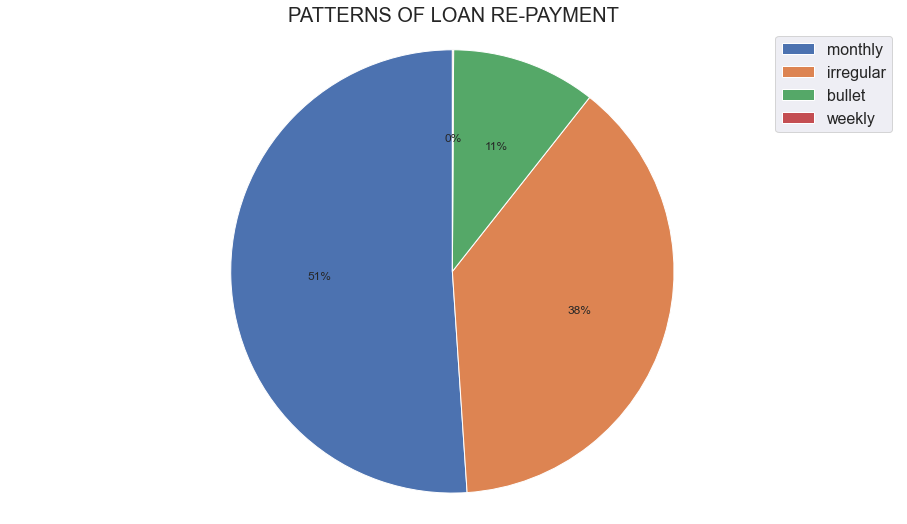

In [33]:
loan_repayment = kiva_loans['repayment_interval'].value_counts()

#Plot a pie-chart to show the gender and its percentages
plt.figure(figsize=(16,9))

plt.pie(loan_repayment.values, autopct = '%1.0f%%',startangle=90)
plt.axis('equal')
plt.title('PATTERNS OF LOAN RE-PAYMENT', fontsize=20)
plt.legend(loan_repayment.index,loc='best',fontsize=16)
plt.show()

Most of the Kiva loan borrowers(51%) have a monthly repayment plan with the instituition. While a negligible percentage repay their loans weeekly. 

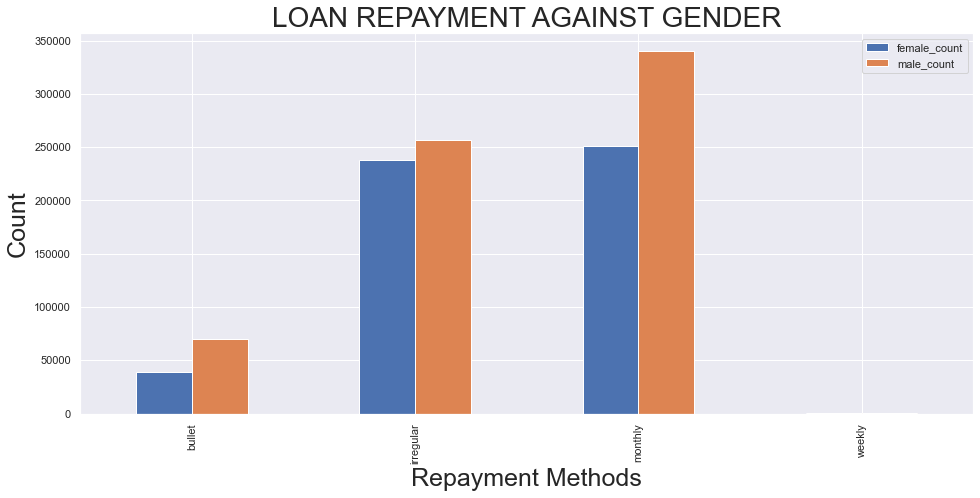

In [34]:
kiva_loans['female_count'] = kiva_loans['gender'].str.count('female')
kiva_loans['male_count'] = kiva_loans['gender'].str.count('male')

terms = pd.pivot_table(kiva_loans,index =['repayment_interval'],values=['female_count','male_count'],
                                   aggfunc=sum)

terms.plot(figsize =(16,7),kind='bar',)
plt.ylabel('Count',fontsize=25)
plt.xlabel('Repayment Methods',fontsize=25)

plt.title('LOAN REPAYMENT AGAINST GENDER',fontsize=28)
plt.show()



 All loan repayment methods favored men more. 